In [1]:
#As the label column(charges) has continuous values it is a regression problem
#importing all the necessary packages for regression problem
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#this is for ignporing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#I have read in the dataset named insurance
df = pd.read_csv('insurance.csv')

In [4]:
#this will give us the number of rows and columns in the dataset
df.shape

(1338, 7)

In [5]:
#this step is to get a look on the first few rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#this step gives us a view of the last few rows of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
# getting the information about all the columns about their data types and number of non null rows etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# here I tried to get a brief statistics about the numerical columns in the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#name of all the columns in the dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
#this code will go into each row of each column in the dataset and sum up the number of null rows for each column
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#this step gives us the count of each value in each column
df.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Length: 1337, dtype: int64

In [12]:
#this step returns the mean value for each numerical column
df.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [13]:
#this step returns the median value for each numerical column
df.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

The mean and median has a very huge difference between mean and median so this is an indication of outliers in the charges column. As charges column is our label column so it is mandatory to remove outliers from our charges column other it will decrease our model performance.

In [14]:
#calculating 1st, 2nd and 3rd quantiles and the Inter - Quartile Range for the charges column in the dataset
q1 = np.quantile(df.charges, 0.25) #1st quantile
q2 = np.quantile(df.charges, 0.5) #2nd quantile
q3 = np.quantile(df.charges, 0.75) #3rd quantile
IQR = q3 - q1 #Inter - Quartile Range

In [15]:
#Here we are setting the fences on our dataset to identify the outliers
lower_lim = q1 - (1.5*IQR) #lower whisker
upper_lim = q3 + (1.5*IQR) #upper whisker

In [16]:
#removal of lower and upper outliers in our data
df = df[~((df.charges > upper_lim) | (df.charges < lower_lim))]

In [17]:
#number of rows left in our data after removal of outliers in our data
df.shape

(1199, 7)

In [18]:
#mean of our data after removal of outliers
df.mean()

age           38.989992
bmi           30.095200
children       1.084237
charges     9927.753402
dtype: float64

In [19]:
#median 0f our data after removal of outliers
df.median()

age           39.00000
bmi           29.73500
children       1.00000
charges     8410.04685
dtype: float64

After the removal of outliers as the mean and median are comparable wee can now continue with our EDA otherwise if we do outlier removal again we might start to lose data as our dataset is not large.

In [20]:
#importing libraries to plot graph
import seaborn as sns 
import matplotlib.pyplot as plt

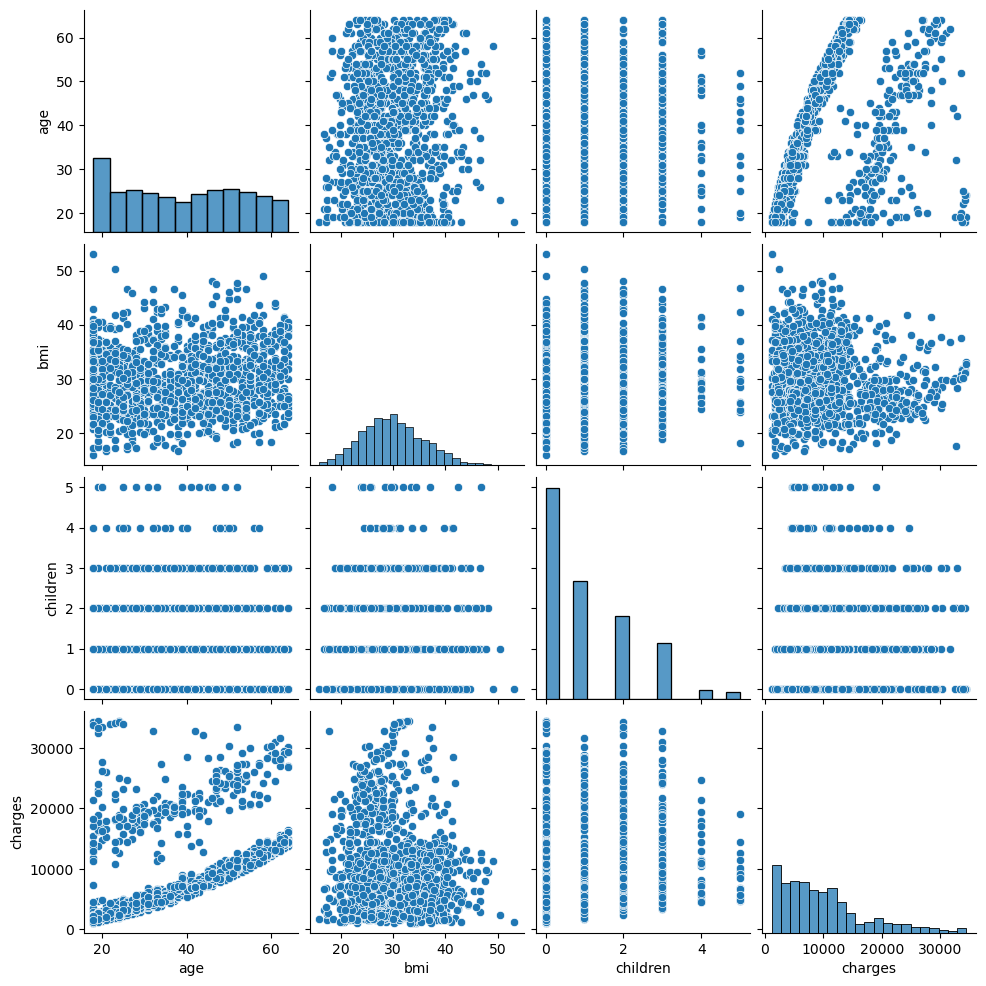

In [21]:
#trying all the bi variate plots possible for our data
sns.pairplot(df)

In [22]:
#finding the correrlation between all the numerical columns.
#As we will be fitting a Linear model for our dataset, this step will help us in getting an idea about which column will have an impact on our model
#this will only give the nature of relation not the magnitude, feature selection cannot be done on the basis of correlation
df.corr()

,age,bmi,children,charges
age,1.000000,0.119505,0.040215,0.437642
bmi,0.119505,1.000000,0.002736,-0.066495
children,0.040215,0.002736,1.000000,0.083713
charges,0.437642,-0.066495,0.083713,1.000000


In [23]:
#defining the features and label column of our data
X = df.drop('charges',axis = 'columns')
y = df[['charges']]

In [24]:
#looking at the shape of our feature and label dataframe
X.shape,y.shape

((1199, 6), (1199, 1))

In [25]:
#seggregating our features into numerical and categorical column's dataframe
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(exclude = np.number)

In [26]:
#A brief descriptive statistics for our categorical features
X_cat.describe()

,sex,smoker,region
count,1199,1199,1199
unique,2,2,4
top,female,no,southeast
freq,612,1061,307


In [27]:
#A brief descriptive statistics for our numerical features 
X_num.describe()

,age,bmi,children
count,1199.000000,1199.000000,1199.000000
mean,38.989992,30.095200,1.084237
std,14.068040,6.010551,1.214304
min,18.000000,15.960000,0.000000
25%,26.000000,25.800000,0.000000
50%,39.000000,29.735000,1.000000
75%,51.000000,33.820000,2.000000
max,64.000000,53.130000,5.000000


In [28]:
#checking the shape of our categorical feature's dataframe and numerical feature's dataframe
X_num.shape, X_cat.shape

((1199, 3), (1199, 3))

In [29]:
#name of our numerical features
X_num.columns

Index(['age', 'bmi', 'children'], dtype='object')

In [30]:
#name of our categorical features
X_cat.columns

Index(['sex', 'smoker', 'region'], dtype='object')

### K - NN Regressor

In [31]:
#importing the min max scaler package for scaling our numerical features and splitting our data into train and test
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [32]:
#min max scaling our numerical features
mms = MinMaxScaler()
X_num_scaled = mms.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled)
X_num_scaled.columns = X_num.columns

In [33]:
#looking athe first few rows after scaling the numerical features
X_num_scaled.head(5)

,age,bmi,children
0,0.021739,0.321227,0.0
1,0.000000,0.479150,0.2
2,0.217391,0.458434,0.6
3,0.326087,0.181464,0.0
4,0.304348,0.347592,0.0


In [34]:
#On- Hot Encoding the categorical features
X_cat_encoded = pd.get_dummies(X_cat, columns = ['sex', 'smoker', 'region'])

In [35]:
#looking the first few rows of the categorical columns after one hot encoding
X_cat_encoded.head(5)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [36]:
#checking for the shape of numerical and categorical features after min max scaling and one hot encoding respectively
X_num_scaled.shape,X_cat_encoded.shape

((1199, 3), (1199, 8))

In [37]:
X_num_scaled.reset_index(inplace = True)

In [38]:
X_cat_encoded.reset_index(inplace = True)

In [39]:
#here we are concatinating our scaled numerical features and encoded categorical features as X
X = pd.concat([X_num_scaled, X_cat_encoded],axis = 'columns')

In [40]:
#dropping the indexes columns
X.drop(['index','index'], axis = 'columns',inplace = True)

In [41]:
#checking for the shape of X
X.shape

(1199, 11)

In [42]:
#spliiting our feature and label data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 2)

In [43]:
#checking for the shape of X train and test, y train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((839, 11), (360, 11), (839, 1), (360, 1))

In [44]:
knn = KNeighborsRegressor(n_neighbors = 5) #instantiating K Nearest Neighbors Regressor
model_knn = knn.fit(X,y) #fitting a K-Nearest Neighbor model to X and y

In [45]:
#importing Mean Absolute Percentage as a model performance metric
from sklearn.metrics import mean_absolute_percentage_error as mape

In [46]:
preds_train = model_knn.predict(X_train)  #predcting for training data
train_MAPE = mape(y_train, preds_train)  #calculating mape for our training data
print(train_MAPE) #printing the mape for our training data

0.28940073836496144


In [47]:
preds_test = model_knn.predict(X_test) #predicting for our test data
test_MAPE = mape(y_test, preds_test)  #calculating mape for our test data
print(test_MAPE) #printing the mape for our test data

0.26687954699993194


### Linear Regression

In [48]:
lr = LinearRegression() #instantiating a linear regression model
model_lr = lr.fit(X,y)  #fitting a linear regression model for our X and y

In [49]:
preds_train_lr = model_lr.predict(X_train) #predicting for our train data using lr model
train_MAPE_lr = mape(y_train, preds_train_lr)  #calculating mape for our train data
print(train_MAPE_lr)  #priniting the mape for our train data

0.31098986736719647


In [50]:
preds_test_lr = model_lr.predict(X_test) #predicting for our test data using lr model
test_MAPE_lr = mape(y_test, preds_test_lr)  #calculating mape for our test data  
print(test_MAPE_lr)  #printing mape for our test data

0.31283738533770555


### Decision Tree Regressor

In [51]:
#importing decision tree regressor package
from sklearn.tree import DecisionTreeRegressor, plot_tree 

In [52]:
#instatiating decision tree regressor with splitting criteria as least sqquare error and maximum depth of 10
dtr = DecisionTreeRegressor(criterion = 'absolute_error',max_depth = 10, random_state = 5)

In [53]:
model_dtr = dtr.fit(X_train,y_train) #ftting our decision tree regressor model

In [54]:
preds_train_dtr = model_dtr.predict(X_train) #predicting our train data using decision tree regressor model
train_MAPE_dtr = mape(y_train, preds_train_dtr) #calculating mape for our train data
print(train_MAPE_dtr) #printing mape for our train data

0.054872228250738946


In [55]:
preds_test_dtr = model_dtr.predict(X_test) #predicting our test data using decision tree regressor model
test_MAPE_dtr = mape(y_test, preds_test_dtr)  #calculating mape for our test data
print(test_MAPE_dtr) #printing mape for our test data

0.18953942902479537


In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [57]:
export_graphviz(model_dtr, out_file ='tree.dot',
feature_names = ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no','smoker_yes', 'region_northeast', 'region_northwest','region_southeast', 'region_southwest'])

In [58]:
plt.figure(figsize = (10,6), dpi = 150)
plot_tree(model_dtr, feature_names = X.columns);

### Lasso

In [59]:
las = Lasso(alpha = 0.01) #instantiating lasso
model_las = las.fit(X,y)  #fitting a lasso model to our X, y

In [60]:
preds_train_las = model_las.predict(X_train)  #predicting for our train data using the lasso regression model
train_MAPE_las = mape(y_train, preds_train_las)  #calculating mape for our train data
print(train_MAPE_las)   #printing mape for our train data

0.310998038245517


In [61]:
preds_test_las = model_las.predict(X_test)  #predicting for our test data
test_MAPE_las = mape(y_test, preds_test_las)  #calculating mape for our test data
print(test_MAPE_las)   #printing mape for our test data

0.3128432728904894


### Ridge

In [62]:
rid = Ridge(alpha = 0.01) #instantiating ridge
model_rid = rid.fit(X,y)  #fitting a ridge model for our X and y

In [63]:
preds_train_rid = model_rid.predict(X_train)   #predicting for our train data using ridge regression model
train_MAPE_rid = mape(y_train, preds_train_rid)   #calculating mape for our train data
print(train_MAPE_rid)  #printing mape for our train data

0.3110385753691931


In [64]:
preds_test_rid = model_rid.predict(X_test) #predicting for our test data using ridge regression model
test_MAPE_rid = mape(y_test, preds_test_rid)   #calculating mape for our test data
print(test_MAPE_rid) #printing mape for our test data

0.3128860783037638


Train MAPE for K-NN Regressor : 0.28940073836496144
Test MPE for  K-NN Regressor : 0.26687954699993194

Train MAPE for Linear Regression : 0.31098986736719647
Test MPE for Linear Regression : 0.31283738533770555

Train MAPE for Decision Tree Regressor : 0.054872228250738946
Test MPE for Decision Tree Regressor : 0.18953942902479537

Train MAPE for Lasso Regression : 0.310998038245517
Test MPE for Lasso Regression : 0.3128432728904894

Train MAPE for Ridge Regression : 0.3110385753691931
Test MPE for Ridge Regression : 0.3110385753691931

The model having least MAPE is the model fitted using Decision Tree but the gap between the train and test MAPE is very high(Variance is very high).